<a href="https://colab.research.google.com/github/jee365/ESAA/blob/main/0516_ch9_1~4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 09. 추천시스템

### 01. 추천시스템의 개요와 배경

하나의 콘텐츠를 선택했을 때 선택된 콘텐츠와 연관된 추천 콘텐츠가 얼마나 사용자의 관심을 끌고 개인에게 맞춘 콘텐츠를 추천했는지는 그 사이트의 평판을 좌우하는 매우 중요한 요소임

#### **온라인 스토어의 필수 요소, 추천 시스템**

온라인 스토어의 상품 관련 DB
- 사용자가 어떤 상품을 구매했는가?
- 사용자가 어떤 상품을 둘러보거나 장바구니에 넣었는가?
- 사용자가 평가한 영화 평점은? 제품 평가는?
- 사용작 스스로 작성한 자신의 취향은?
- 사용자가 무엇을 클릭했는가?

#### **추천 시스템의 유형**

- 콘텐츠 기반 필터링 방식
- 협업 필터링 방식(Netfilx!)
  1. 최근접 이웃 협업 필터링
  2. 잠재 요인 협업 필터링

### 02. 콘텐츠 기반 필터링 추천 시스템

사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식

ex. 사용자가 특정 영화에 높은 평점을 줬다면 그 영화의 장르, 출연 배우, 감독, 영화 키워드 등 콘텐츠와 유사한 다른 영화를 추천해주는 방식

### 03. 최근접 이웃 협업 필터링

사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 행동 양식만을 기반으로 추천을 수행하는 것

목표: 사용자 - 아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터를 기반으로 사용자가 아직 평가하지 않은 아이템을 예측 평가(Predicted Rating)하는 것

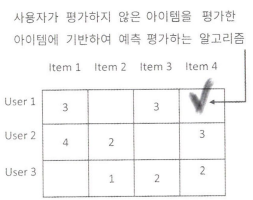


사용자-아이템 평점 행렬에서 행(Row)은 개별 사용자, 열(Column)은 개별 아이템으로 구성되며, 사용자가 아이디 행, 아이템 아이디 열 위치에 해당하는 값이 평점을 나타냄

사용자가 아이템에 대한 평점을 매기는 경우가 많지 않기에 주로 **희소 행렬**

- 사용자 기반(User-User): 당신과 비슷한 고객들이 다음 상품도 구매했습니다
- 아이템 기반(Item-Item): 이 상품을 선택한 다른 고객들은 다음 상품도 구매했습니다

**사용자 기반 최근접 이웃 방식**: 특정 사용자와 유사한 다른 사용자를 TOP-N으로 선정해 이 TOP-N 사용자가 좋아하는 아이템을 추천하는 방식

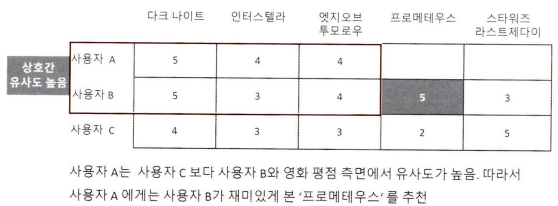

**아이템 기반 최근접 이웃 방식**: 아이템이 가지는 속성과 상관없이 사용자들이 그 아이템을 좋아하는지/싫어하는지의 평가 척도가 유사한 아이템을 추천하는 기준이 되는 알고리즘

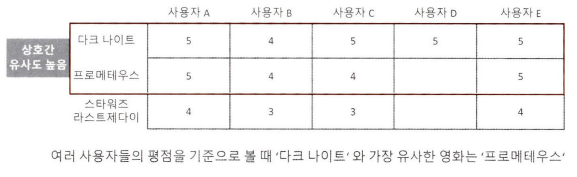

일반적으로 사용자 기반 협업 필터링 정확도 <<< **아이템 기반 협업 필터링 정확도**

ex) 매우 유명한 영화는 취향과 관계없이 대부분의 사람들이 관람

추천시스템에서 사용되는 데이터는 다차원 희소 행렬이기에 코사인 유사도를 주로 이용

### 04. 잠재 요인 협업 필터링

#### **잠재 요인 협업 필터링의 이해**

사용자-아이템 평점 행렬 데이터만을 이용해 '잠재 요인'을 끄집어내는 과정

'잠재 요인'을 기반으로 다차원 희소 행렬인 **사용자-아이템 행렬** 데이터를 저차원 밀집 행렬인 **사용자-잠재 요인 행렬**과 아이템-잠재 요인 행렬의 전치 행렬(**잠재 요인 - 아이템 행렬**)로 분해

이렇게 분해된 두 행렬의 내적을 통해 새로운 **예측 사용자-아이템 평점 행렬** 데이터를 만들어 사용자가 아직 평점을 부여하지 않은 아이템에 대한 예측 평점을 생성하는 것

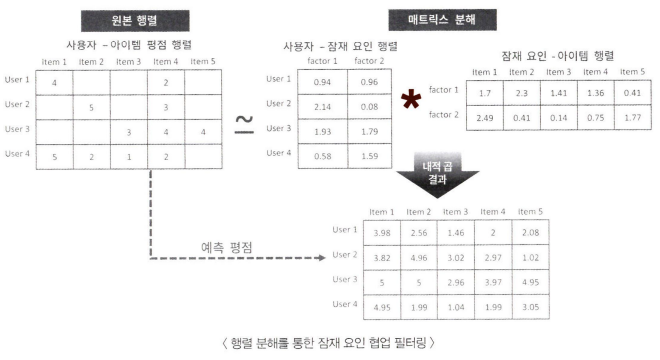

ex) 사용자-잠재 요인 행렬: 사용자의 영화 장르에 대한 선호도 / 아이템-잠재 요인 행렬: 영화의 장르별 특성값

사용자-아이템 평점 행렬 R에서 사용자(User)의 아이템(Item)에 대한 평점을 R(u,i)라 하자

u는 사용자 아이디, i는 아이템 아이디

사용자-잠재 요인 행렬을 사용자의 영화 장르별 선호도 행렬 P라 가정하고 factor 1을 액션 선호도, factor 2를 로맨스 선호도로 가정

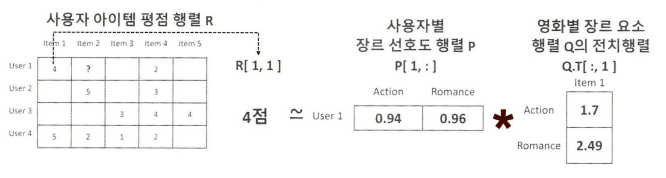

P(1,1): 0.94 / P(1,2): 0.96

Q.T(1,1): 1.7 / Q.T(2,1): 2.49

평점: 사용자의 특정 영화 장르에 대한 선호도와 개별 영화의 장르적 특성값을 반영

아직 User 1이 평점을 매기지 못한 Item 2에 대해 예측 평점을 수행

R(1,2): P 매트릭스의 User 1 벡터와 Q.T 매트릭스의 Item 2 벡터의 내적 결과값인 2.56으로 예측할 수 있음

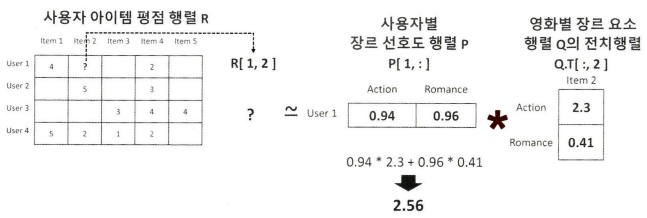

#### **행렬 분해의 이해**

행렬 분해: 다차원의 매트릭스를 저차원 매트릭스로 분해하는 기법(SVD, NMF)

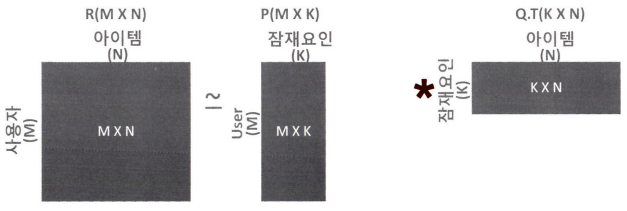






**R = P * Q.T**

- M은 총 사용자 수
- N은 총 아이템 수
- K는 잠재 요인의 차원 수
- R은 M*N 차원의 사용자-아이템 평점 행렬
- P는 사용자와 잠재 요인과의 관계 값을 가지는 M*K 차원의 사용자-잠재 요인 행렬
- Q는 아이템과 잠재 요인과의 관계 값을 가지는 N*K 차원의 아이템-잠재 요인 행렬
- Q.T는 Q 매트릭스와 행과 열 값을 교환한 전치 행렬

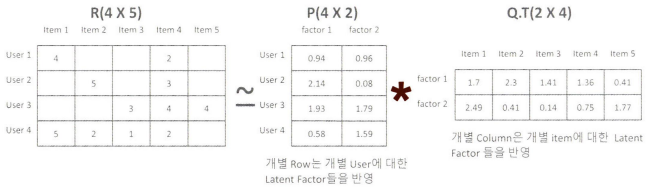

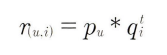

r(2,4) 예측값: p2*q'4

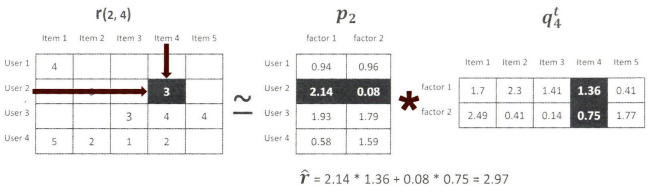



r(2,3) 예측값: p2*q'3

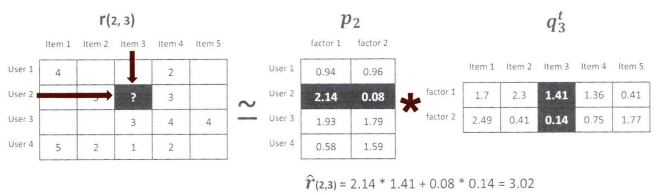

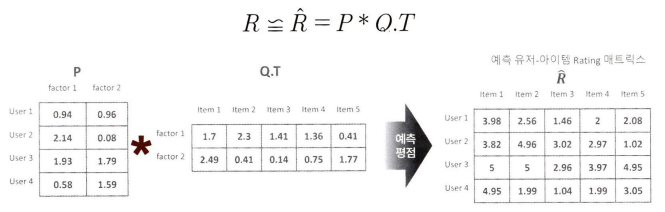

행렬 분해는 주로 SVD 방식을 이용하지만, SVD는 Null 값이 없는 행렬에만 적용할 수 있음

-> 확률적 경사 하강법(SGD)이나 ALS(Alternating Least Squares) 방식을 이용

#### 확률적 경사 하강법을 이용한 행렬 분해

P와 Q 행렬로 계산된 예측 R 행렬 값이 실제 R 행렬 값과 가장 최소의 오류를 가질 수 있도록 반복적인 비용 함수 최적화를 통해 P와 Q를 유추해내는 것

확률적 경사 하강법(SGD)을 이용한 행렬 분해의 절차

1. P와 Q를 임의의 값을 가진 행렬로 설정합니다.
2. P와 Q.T 값을 곱해 예측 R 행렬을 계산하고 예측 R 행렬에 해당하는 오류 값을 계산합니다.
3. 이 오류 값을 최소화할 수 있도록 P와 Q 행렬을 적절한 값으로 각각 업데이트합니다.
4. 만족할 만한 오류 값을 가질 때까지 2, 3번 작업을 반복하면서 P와 Q 값을 업데이트 해 근사화합니다.

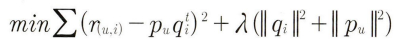

예측 오류값의 최소화와학습 시 과적합을 피하기 위해 규제를 반영한 비용 함수를 적용

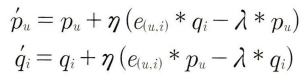

- pu: P행렬의 사용자 u행 벡터
- q'i: Q행렬의 아이템 i행의 전치 벡터
- r(u,i): 실제 R 행렬의 u행, i열에 위치한 값
- rhat(u,i): 예측 R 행렬의 u행, i열에 위치한 값(pu*q'i)
- e(u,i): u행, i열에 위치한 실제 행렬 값과 예측 행렬 값의 차이 오류(r(u,i)-rhat(u,i))
- 𝝶: SGD 학습률
- 𝛌: L2 규제 계수

L2 규제를 반영해 실제 R 행렬 값과 예측 R 행렬 값의 차이를 최소화하는 방향성을 가지고 P행렬과 Q행렬에 업데이트

<SGD를 이용해 행렬 분해를 수행하는 예제>


In [3]:
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재 요인 차원 K는 3으로 설정
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN],
             [np.NaN,5,np.NaN,3,1],
             [np.NaN,np.NaN,3,4,4],
             [5,2,1,2,np.NaN]])
num_users, num_items = R.shape
K=3

#P와 Q 행렬의 크기를 지정하고 정규 분포를 가진 임의의 값으로 입력합니다
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users,K))
Q = np.random.normal(scale=1./K, size=(num_items,K))


In [4]:
from sklearn.metrics import mean_squared_error

def get_rmse(R,P,Q,non_zeros):
  error = 0
  # 두 개의 분해된 행렬 P와 Q.T의 내적으로 예측 행렬 R 생성
  full_pred_matrix = np.dot(P, Q.T)

  #실제 R 행렬에서 널이 아닌 값의 위치 인덱스를 추출해 실제 R 행렬과 예측 행렬의 RMSE 추출
  x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
  y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
  R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
  full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
  mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
  rmse = np.sqrt(mse)

  return rmse

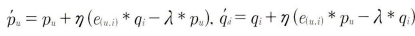

In [5]:
# R > 0인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장
non_zeros = [(i,j,R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0]

steps = 1000 #SGD를 반복해서 업데이트 할 횟수
learning_rate = 0.01 #SGD의 학습률
r_lambda = 0.01 #L2 Regularization 계수

#SGD 기법으로 P와 Q 매트릭스를 계속 업데이트
for step in range(steps):
  for i,j,r in non_zeros:
    #실제 값과 예측 값의 차이인 오류 값 구함
    eij = r-np.dot(P[i,:], Q[j,:].T)
    #Regularization을 반영한 SGD 업데이트 공식 적용
    P[i,:] = P[i,:] + learning_rate*(eij*Q[j,:]-r_lambda*P[i,:])
    Q[j,:] = Q[j,:] + learning_rate*(eij*P[i,:]-r_lambda*Q[j,:])
    rmse = get_rmse(R,P,Q, non_zeros)
    if (step % 50)==0: # 50회 반복할 때마다 오류 값 출력
      print('### iteration step :', step, 'rmse : ', rmse)


### iteration step : 0 rmse :  3.261355059488935
### iteration step : 0 rmse :  3.26040057174686
### iteration step : 0 rmse :  3.253984404542389
### iteration step : 0 rmse :  3.2521583839863624
### iteration step : 0 rmse :  3.252335303789125
### iteration step : 0 rmse :  3.251072196430487
### iteration step : 0 rmse :  3.2492449982564864
### iteration step : 0 rmse :  3.247416477570409
### iteration step : 0 rmse :  3.241926055455223
### iteration step : 0 rmse :  3.2400454107613084
### iteration step : 0 rmse :  3.240166740749792
### iteration step : 0 rmse :  3.2388050277987723
### iteration step : 50 rmse :  0.5003190892212748
### iteration step : 50 rmse :  0.5001616291326989
### iteration step : 50 rmse :  0.49899601202578087
### iteration step : 50 rmse :  0.4988483450145831
### iteration step : 50 rmse :  0.49895189256631756
### iteration step : 50 rmse :  0.49833236830090993
### iteration step : 50 rmse :  0.4984148489378701
### iteration step : 50 rmse :  0.497925995802408

In [7]:
#분해된 P와 Q 함수를 P*Q.T로 예측 행렬을 만들어서 출력

pred_matrix = np.dot(P,Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))

예측 행렬:
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]
